### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import yeojohnson
from sklearn.preprocessing import LabelEncoder

### Reading CSV Files

In [2]:
df = pd.read_csv('Copper_Set.xlsx.csv')

C:\Users\vijay\AppData\Local\Temp\ipykernel_95284\3348997962.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Copper_Set.xlsx.csv')


#### Data Info

In [3]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [4]:
df.shape

(181673, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


### Handling Null values

In [6]:
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [7]:
null_to_drop = ['id','item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width',
       'product_ref', 'delivery date', 'selling_price']
df = df.dropna(subset = null_to_drop)

### Feature Engineering

### ID column

In [8]:
len(df['id'].unique())

181636

In [9]:
df.drop('id', axis = 1, inplace = True)

### Date column

In [10]:
col_to_date = ['item_date','delivery date']
for col in col_to_date:
    df[col] = df[col].astype(str)
    df[col] = pd.to_datetime(df[col],format='%Y%m%d.0', errors = 'coerce')

In [11]:
df['purchased_day'] = df['item_date'].dt.day
df['purchased_month'] = df['item_date'].dt.month
df['purchased_year'] = df['item_date'].dt.year

df['delivered_day'] = df['delivery date'].dt.day
df['delivered_month'] = df['delivery date'].dt.month
df['delivered_year'] = df['delivery date'].dt.year

In [12]:
df.drop(['item_date','delivery date'],axis = 1, inplace = True)

### Quantity Tons column

In [13]:
df['quantity tons'] = df['quantity tons'].astype(str)

In [14]:
count = 0
for index, value in df.iterrows():
    if value['quantity tons'].isalpha():
        count+=1
        print(index)
print(count)

173086
1


In [15]:
if 173086 in df.index:
    df = df.drop(173086)

In [16]:
df['quantity tons'] = df['quantity tons'].astype(float)

In [17]:
index_to_remove = df[df['quantity tons'] < 0].index

In [18]:
index_to_remove

Index([105730, 131473, 181661, 181671], dtype='int64')

In [19]:
df = df.drop(index_to_remove,axis = 0)

In [20]:
df['quantity tons'] = np.round(df['quantity tons'],2)

### Status column

In [21]:
df.status.unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [22]:
status_len = len(df[(df['status'] == 'Won') | (df['status'] == 'Lost')])

In [23]:
status_len

150435

In [24]:
len(df) - status_len

31196

In [25]:
df = df[(df['status'] == 'Won') | (df['status'] == 'Lost')]

### Material_ref column

In [26]:
df['material_ref'].value_counts()

material_ref
DX51D+Z                                     851
DC01 RED.FLAT KUCHNIA EKO 2.2               776
G9010                                       623
DC01                                        600
G9006                                       520
                                           ... 
0000000000000000000000000000000015063789      1
0000000000000000000000000000000015043955      1
0000000000000000000000000000000015063786      1
0000000000000000000000000000000015057633      1
202006170005.IO.1.1                           1
Name: count, Length: 15820, dtype: int64

In [27]:
df['material_ref'] = df['material_ref'].replace('^00000',np.nan, regex = True)

In [28]:
df = df.dropna(subset=['material_ref'])

In [29]:
cols_to_convert = ['customer','country','application']

for col in cols_to_convert:
    df[col] = df[col].astype(int)
    
df['product_ref'] = df['product_ref'].astype(str)

In [30]:
numerical_features = ['quantity tons', 'thickness', 'width','selling_price']

In [31]:
for col in numerical_features:
    size = len(df[df[col] <= 0])
    print(col, ':', size)
    
    if size > 0:
        df = df[df[col] > 0]

df.reset_index(drop=True, inplace=True)

quantity tons : 2
thickness : 0
width : 0
selling_price : 1


In [32]:
df = df.dropna().reset_index(drop = True)

In [33]:
df.head()

,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,selling_price,purchased_day,purchased_month,purchased_year,delivered_day,delivered_month,delivered_year
0,54.15,30156308,28,Won,W,10,2.00,1500.0,DEQ1 S460MC,1670798778,854.00,1.0,4.0,2021.0,1.0,7.0,2021.0
1,386.13,30153963,30,Won,WI,28,0.38,952.0,S0380700,628377,644.33,1.0,4.0,2021.0,1.0,1.0,2021.0
2,202.41,30349574,32,Won,S,59,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,768.00,1.0,4.0,2021.0,1.0,1.0,2021.0
3,785.53,30211560,28,Won,W,10,4.00,2000.0,2_S275JR+AR-CL1,640665,577.00,1.0,4.0,2021.0,1.0,3.0,2021.0
4,32.24,30202362,27,Won,S,10,0.60,1010.0,DC04EK,628377,973.00,1.0,4.0,2021.0,1.0,7.0,2021.0


### EDA

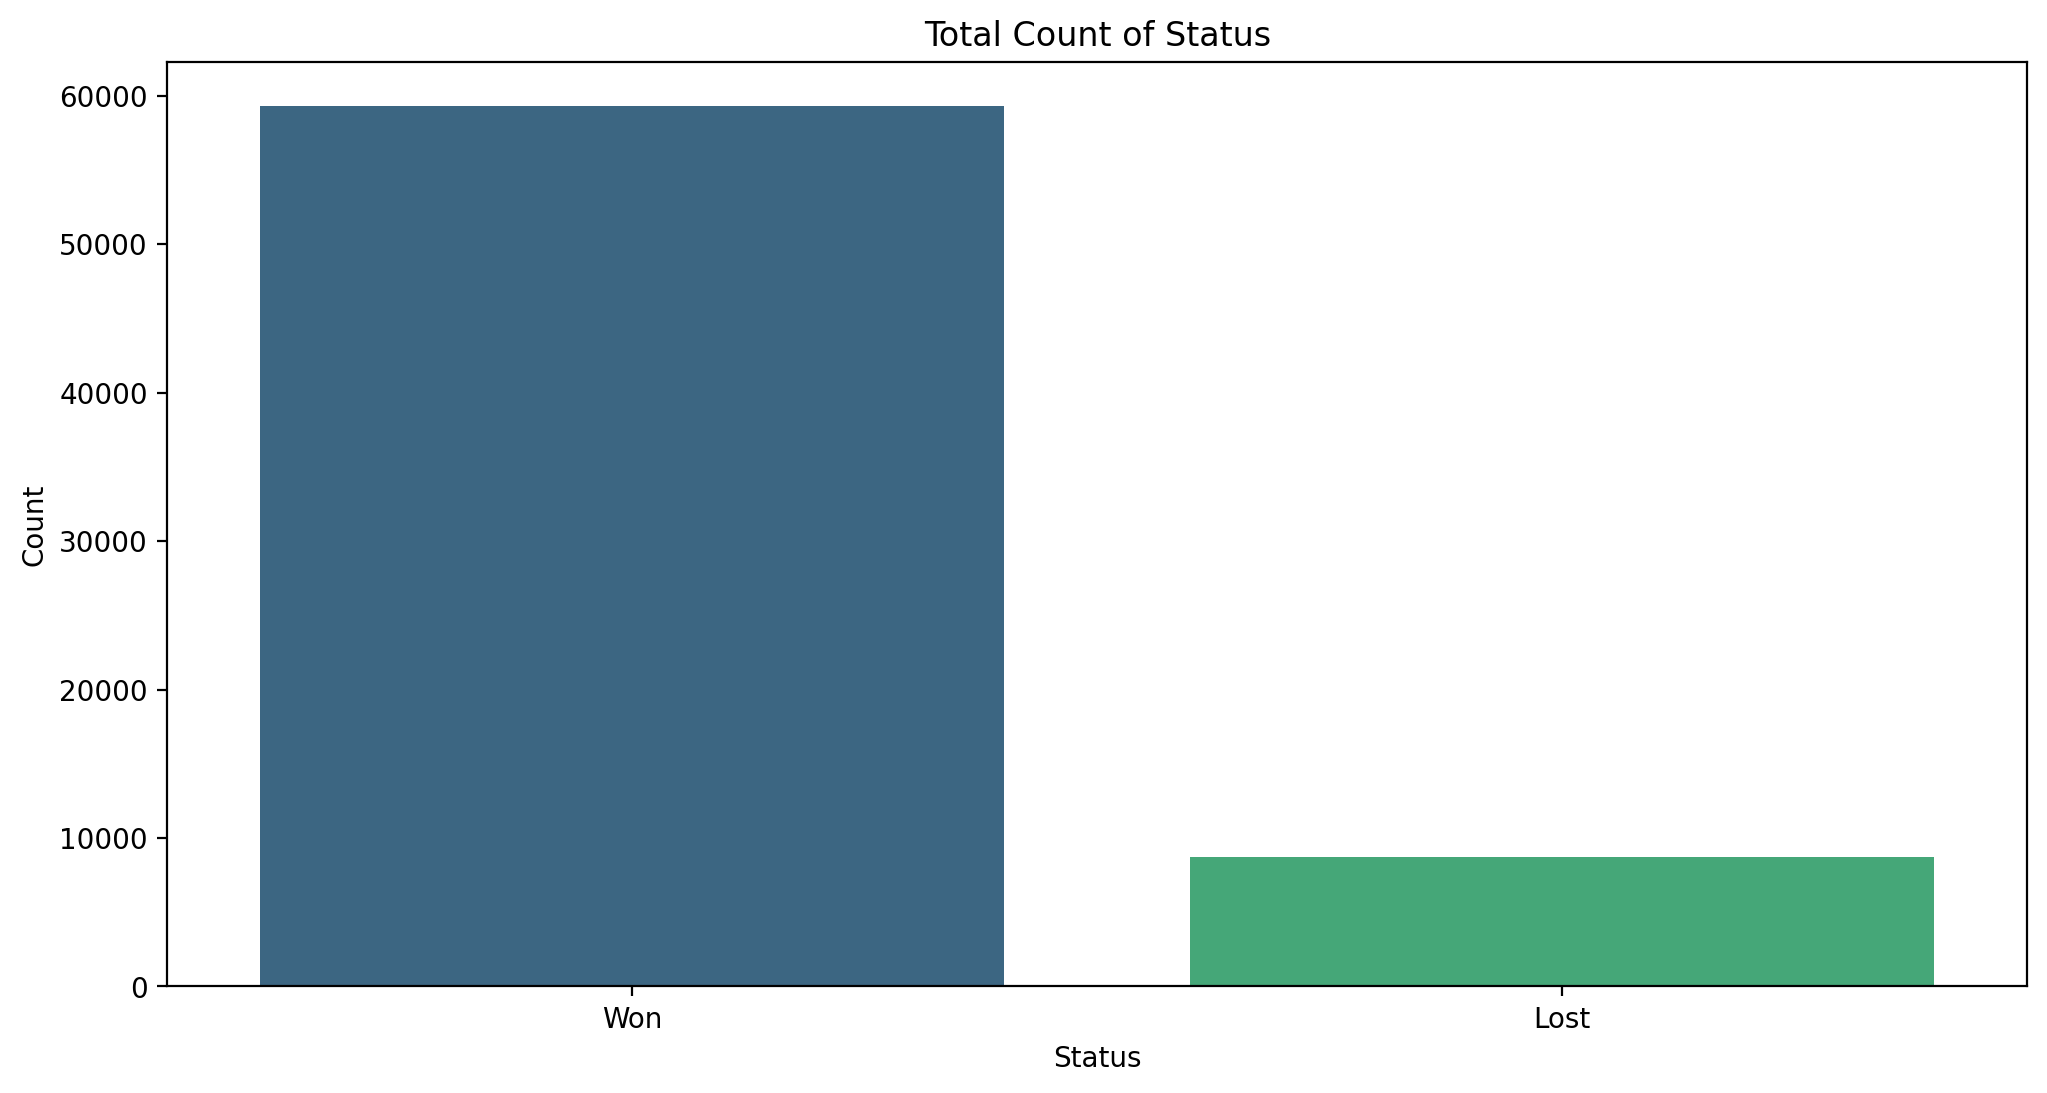

In [34]:
plt.figure(figsize=(12, 6), dpi=200)

sns.countplot(data = df, x = 'status', palette='viridis', hue = 'status')

plt.title('Total Count of Status')
plt.xlabel('Status')
plt.ylabel('Count')

plt.show()

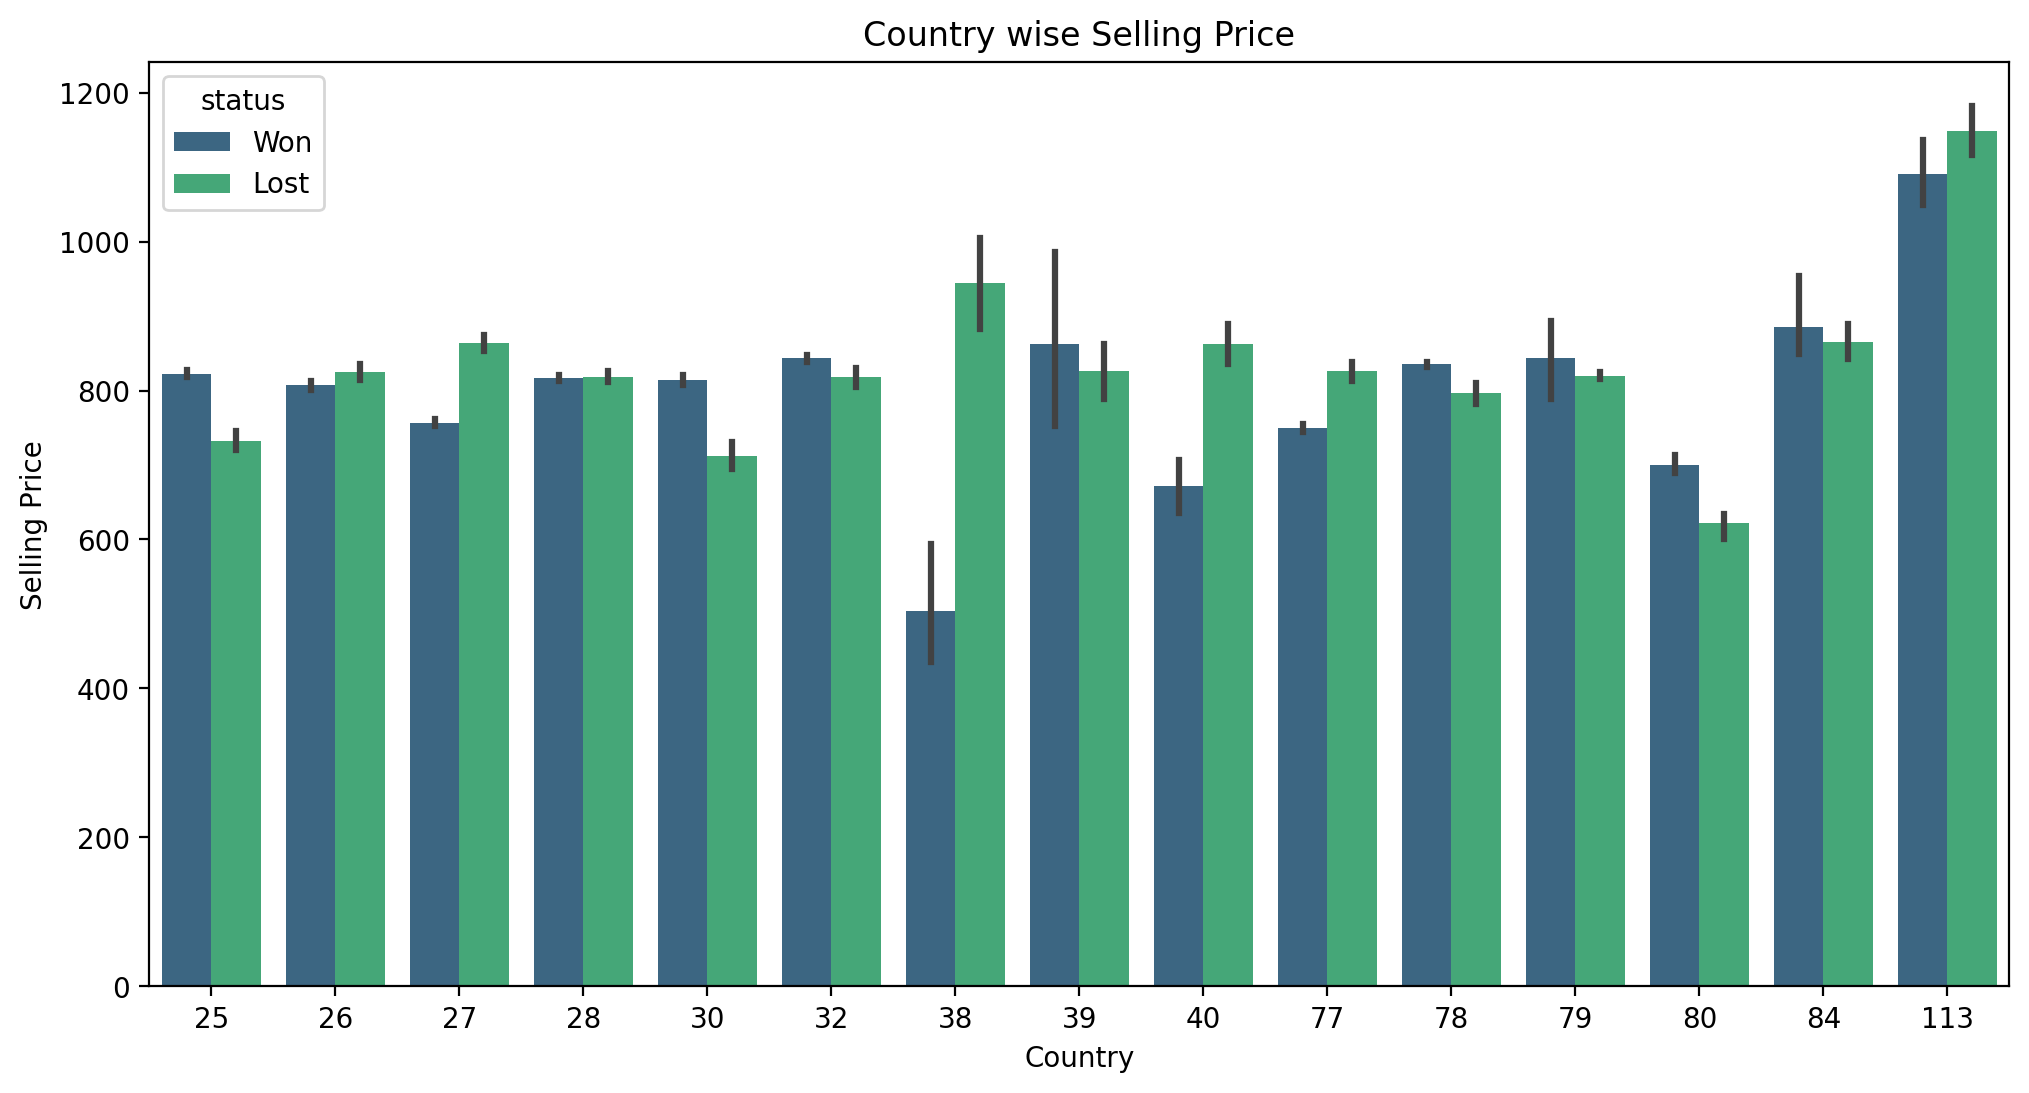

In [35]:
plt.figure(figsize=(12, 6), dpi=200)

sns.barplot(data = df, x = 'country', y = 'selling_price',
           hue = 'status', palette='viridis')

plt.title('Country wise Selling Price')
plt.xlabel('Country')
plt.ylabel('Selling Price')

plt.show()

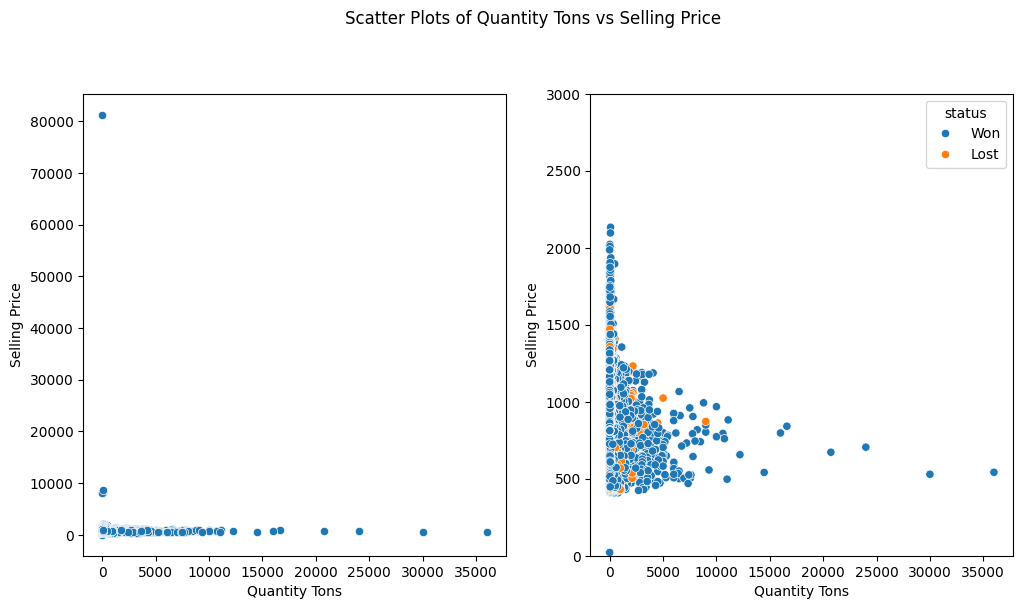

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.scatterplot(data=df, x='quantity tons', y='selling_price', ax=axes[0])

axes[0].set_xlabel('Quantity Tons')
axes[0].set_ylabel('Selling Price')

sns.scatterplot(data=df, x='quantity tons', y='selling_price', 
                hue = 'status', ax=axes[1])

axes[1].set_xlabel('Quantity Tons')
axes[1].set_ylabel('Selling Price')
axes[1].set_ylim(0, 3000) 

plt.suptitle('Scatter Plots of Quantity Tons vs Selling Price', y=1.02)
plt.show()

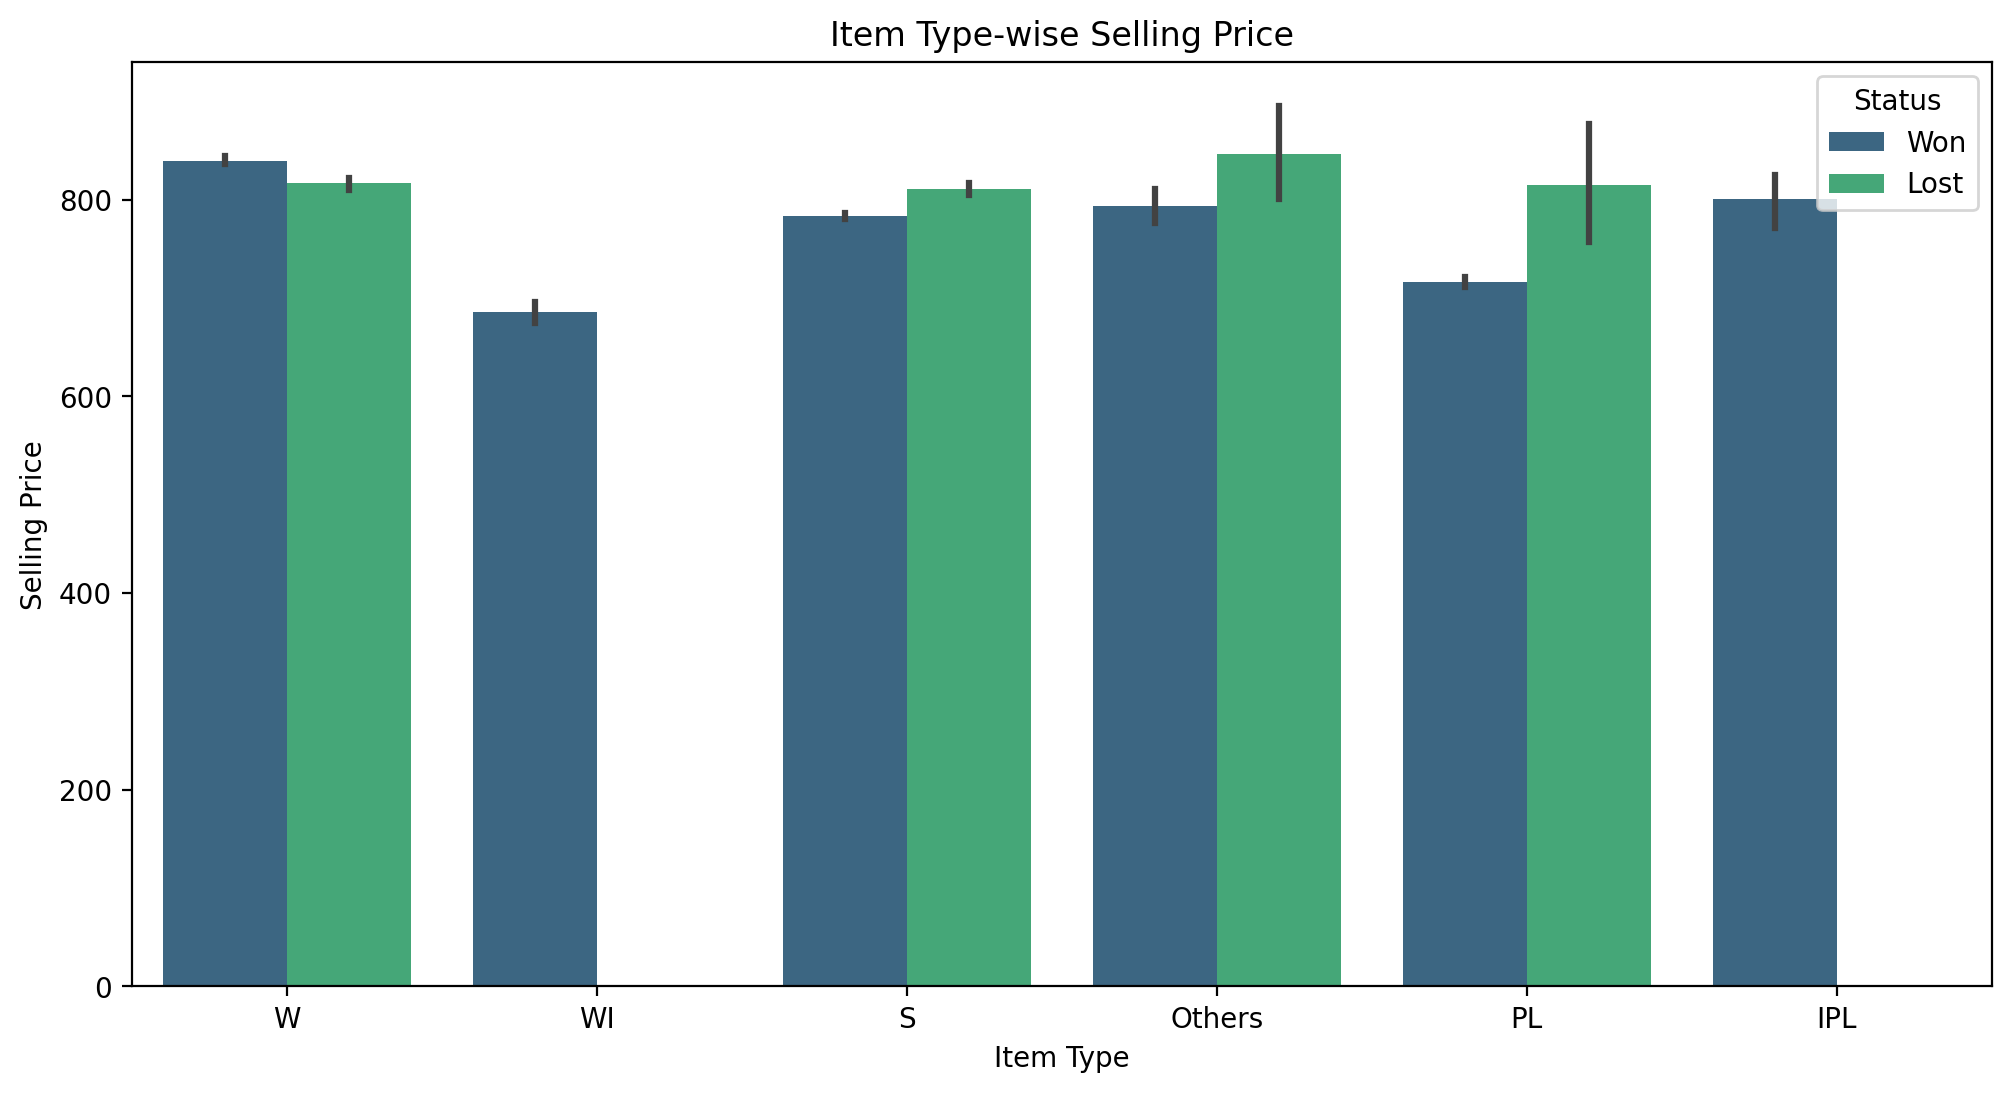

In [37]:
plt.figure(figsize=(12, 6), dpi=200)

sns.barplot(data=df, x='item type', y='selling_price', 
            hue='status', palette='viridis')

plt.title('Item Type-wise Selling Price')
plt.xlabel('Item Type')
plt.ylabel('Selling Price')

plt.legend(title='Status')

plt.show()

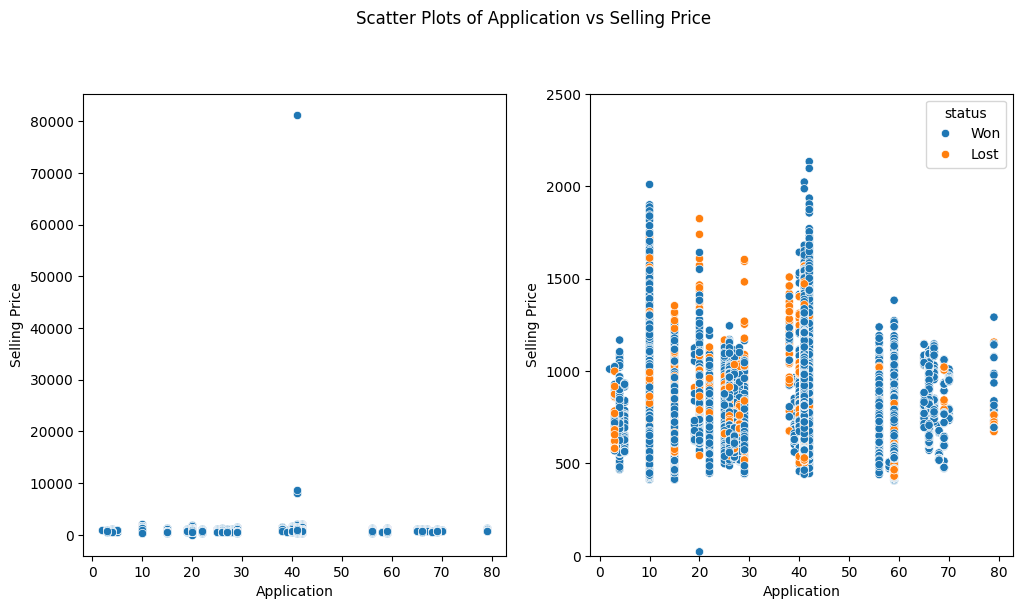

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.scatterplot(data=df, x='application', y='selling_price', ax=axes[0])
axes[0].set_xlabel('Application')
axes[0].set_ylabel('Selling Price')

sns.scatterplot(data=df, x='application', y='selling_price', 
                hue = 'status', ax=axes[1])

axes[1].set_xlabel('Application')
axes[1].set_ylabel('Selling Price')
axes[1].set_ylim(0, 2500) 

plt.suptitle('Scatter Plots of Application vs Selling Price', y=1.02)
plt.show()

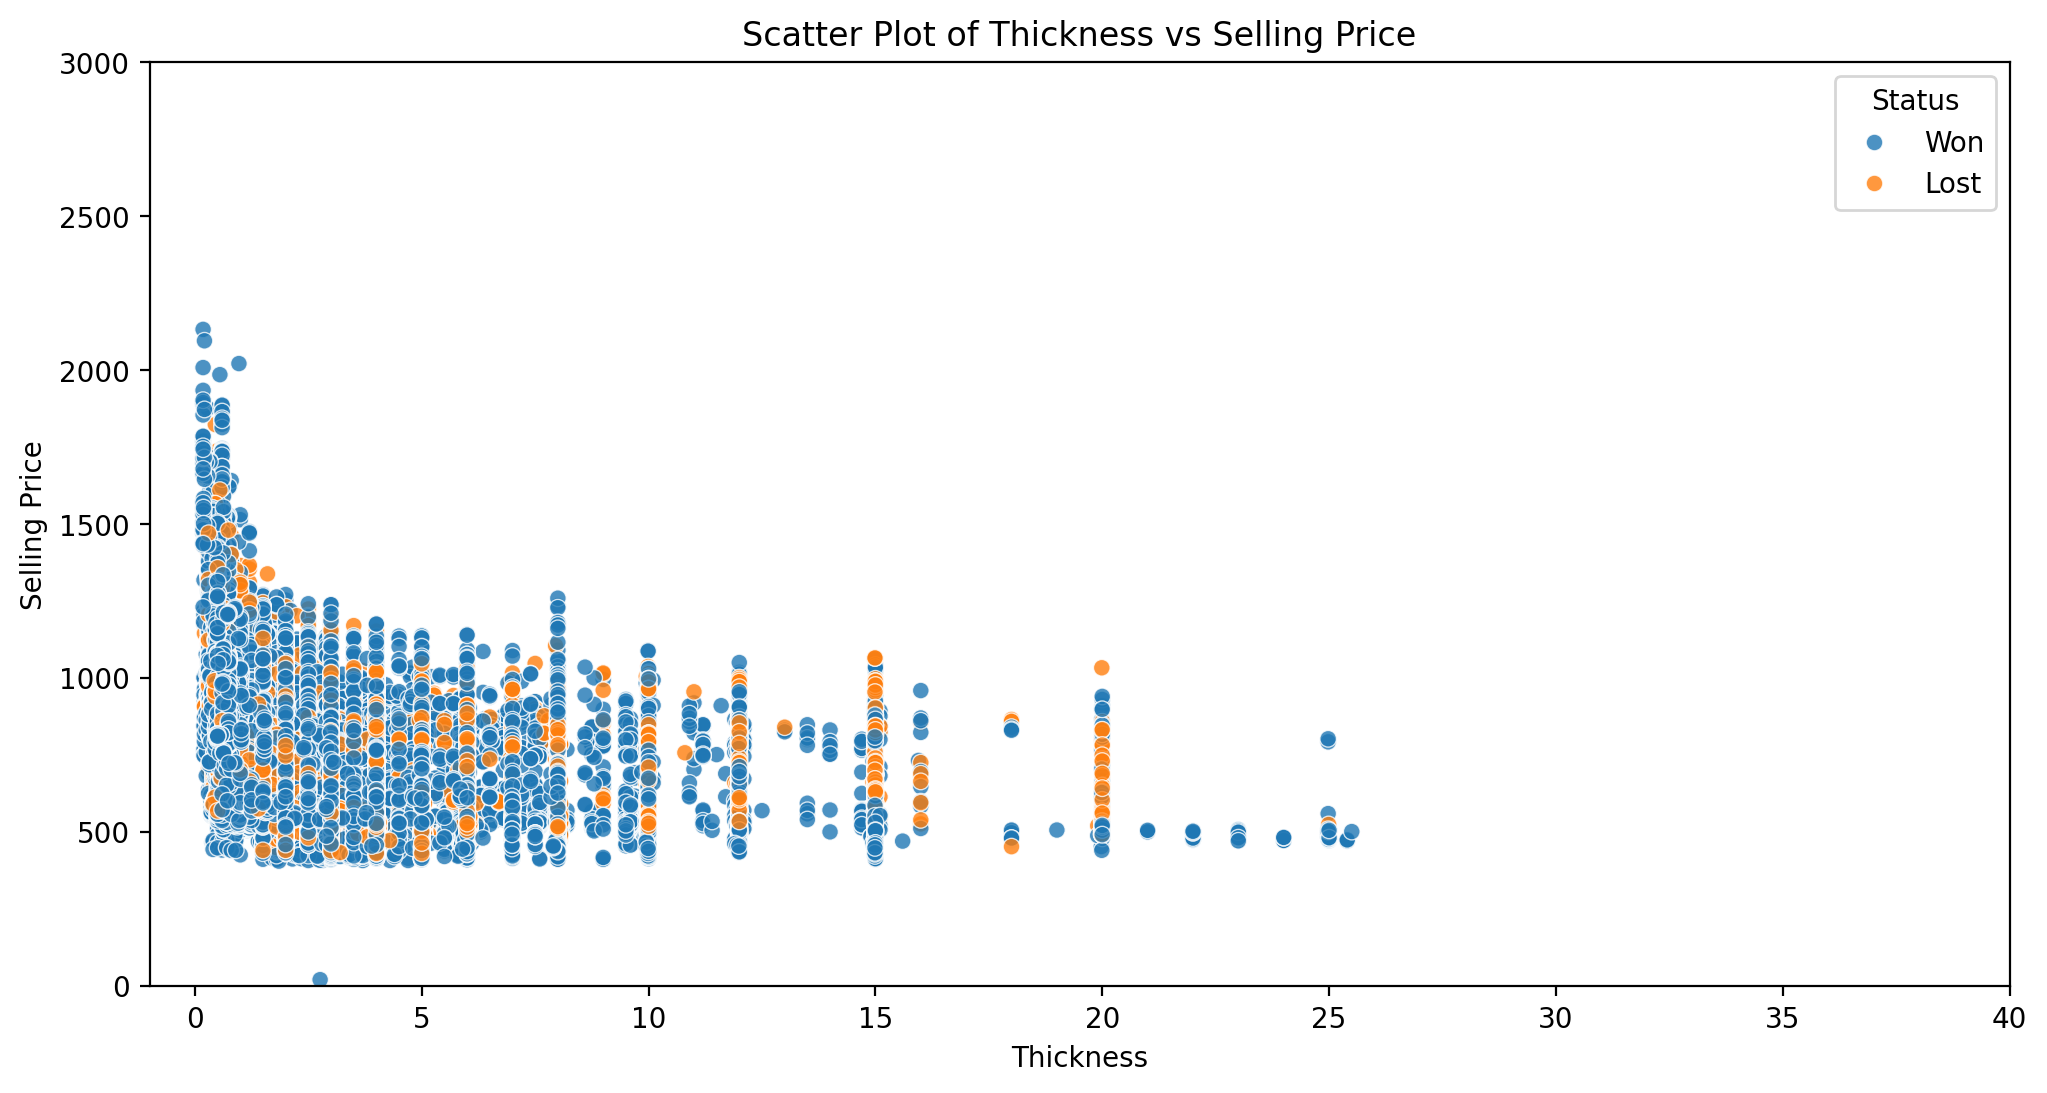

In [39]:
plt.figure(figsize=(12, 6), dpi=200)

sns.scatterplot(data = df, x = 'thickness', y = 'selling_price',
               hue = 'status', alpha = 0.8)

plt.xlim(-1,40)
plt.ylim(-1,3000)
plt.title('Scatter Plot of Thickness vs Selling Price')
plt.xlabel('Thickness')
plt.ylabel('Selling Price')

plt.legend(title='Status')
plt.show();

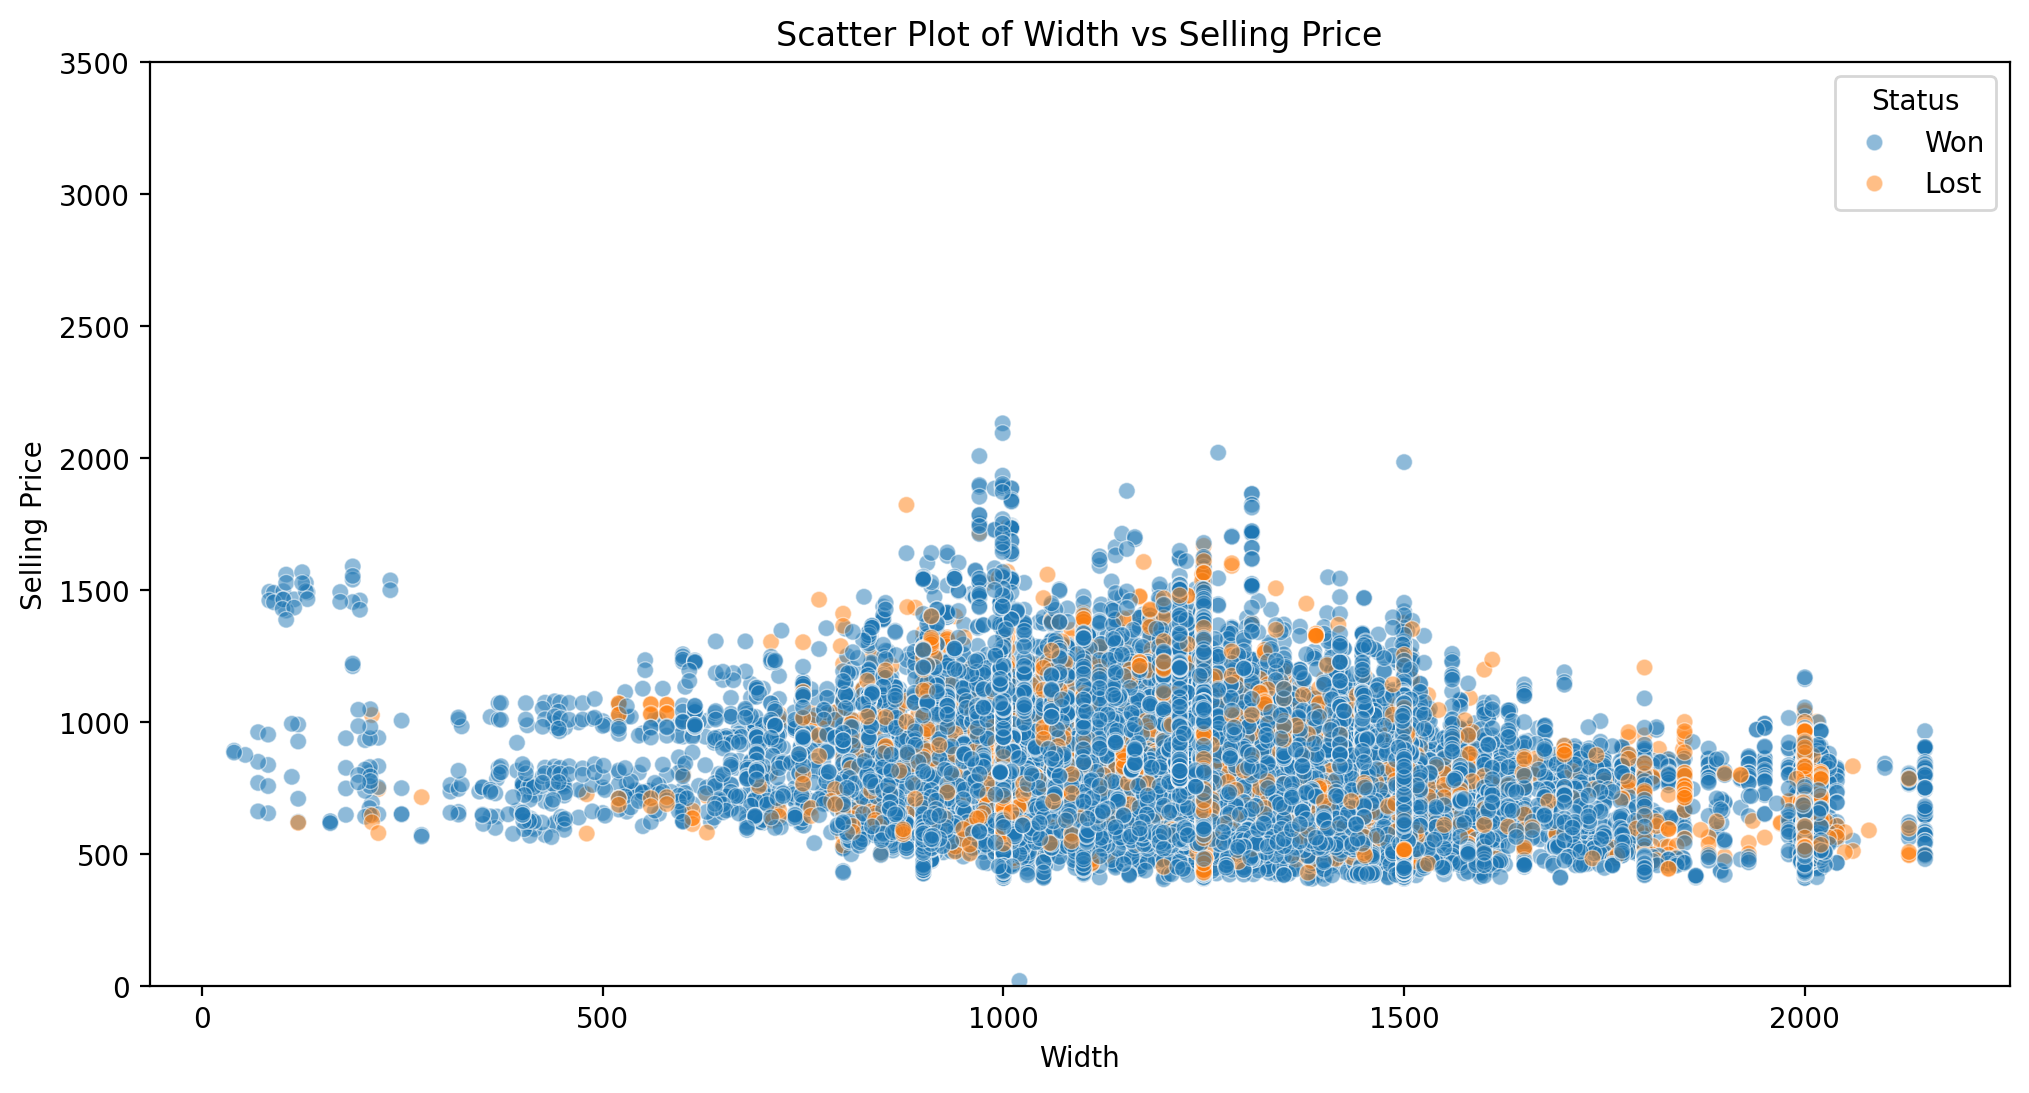

In [40]:
plt.figure(figsize=(12, 6), dpi=200)

sns.scatterplot(data = df, x = 'width', y = 'selling_price',
               hue = 'status', alpha = 0.5)

plt.ylim(0,3500)
plt.title('Scatter Plot of Width vs Selling Price')
plt.xlabel('Width')
plt.ylabel('Selling Price')

plt.legend(title='Status')
plt.show();

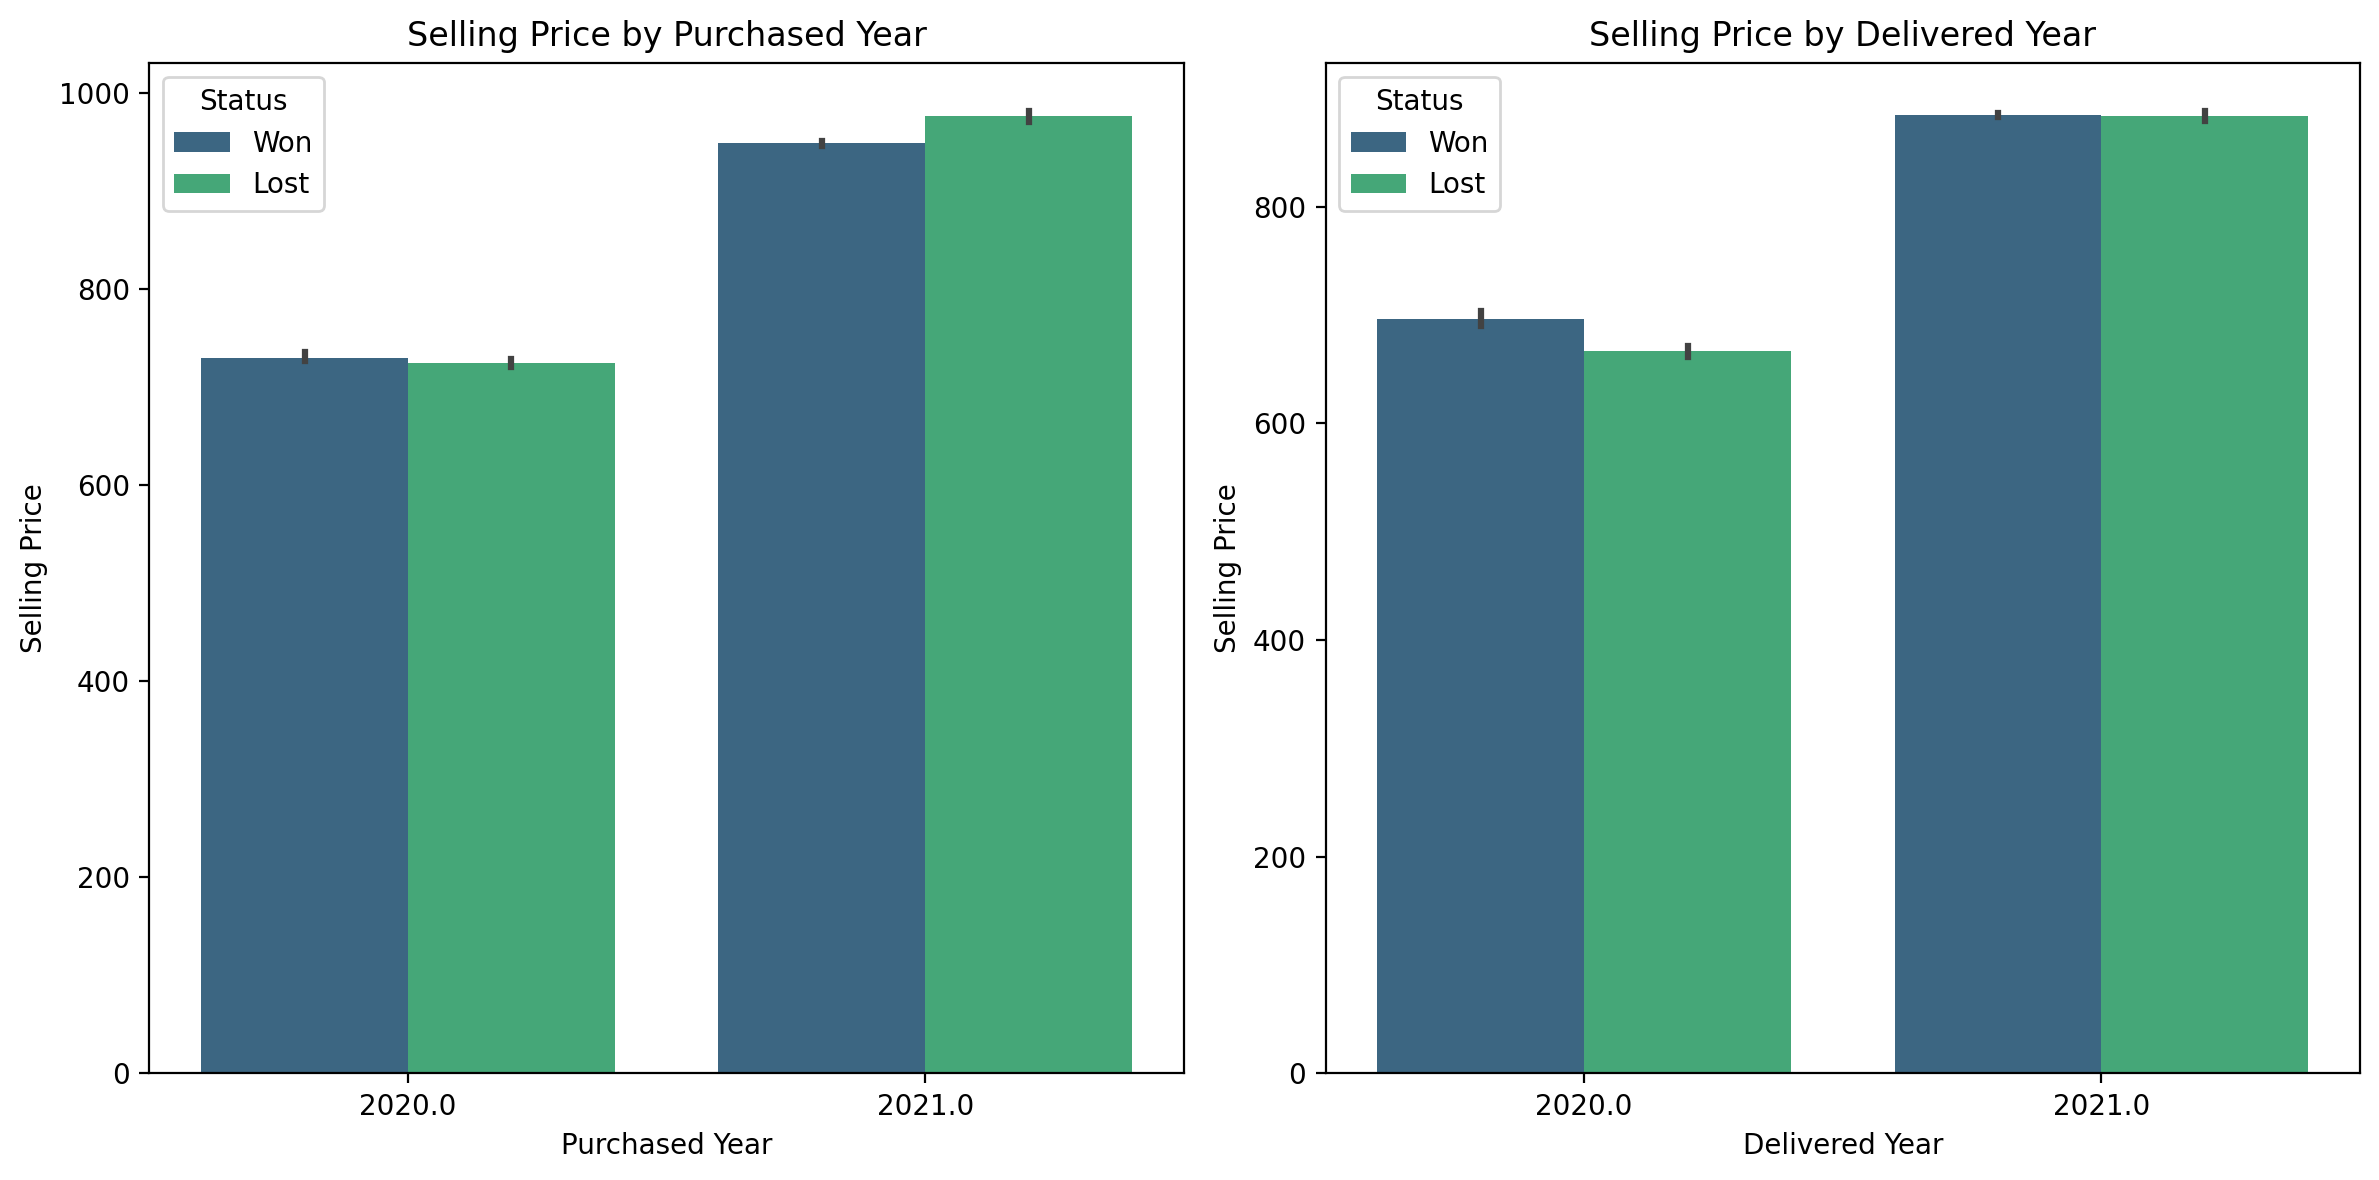

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), dpi=200)

# Bar plot for 'purchased_year'
sns.barplot(data=df, x='purchased_year', y='selling_price', 
            hue='status', palette='viridis', ax=axes[0])
axes[0].legend(title='Status')
axes[0].set_title('Selling Price by Purchased Year')
axes[0].set_xlabel('Purchased Year')
axes[0].set_ylabel('Selling Price')

# Bar plot for 'delivered_year'
sns.barplot(data=df, x='delivered_year', y='selling_price', 
            hue='status', palette='viridis', ax=axes[1])
axes[1].legend(title='Status')
axes[1].set_title('Selling Price by Delivered Year')
axes[1].set_xlabel('Delivered Year')
axes[1].set_ylabel('Selling Price')

plt.tight_layout()

plt.show();

### Detecting Outliers

In [42]:
numeric_cols = df.select_dtypes(['int32','float64']).columns.to_list()[:7]

In [43]:
numeric_cols

['quantity tons',
 'customer',
 'country',
 'application',
 'thickness',
 'width',
 'selling_price']

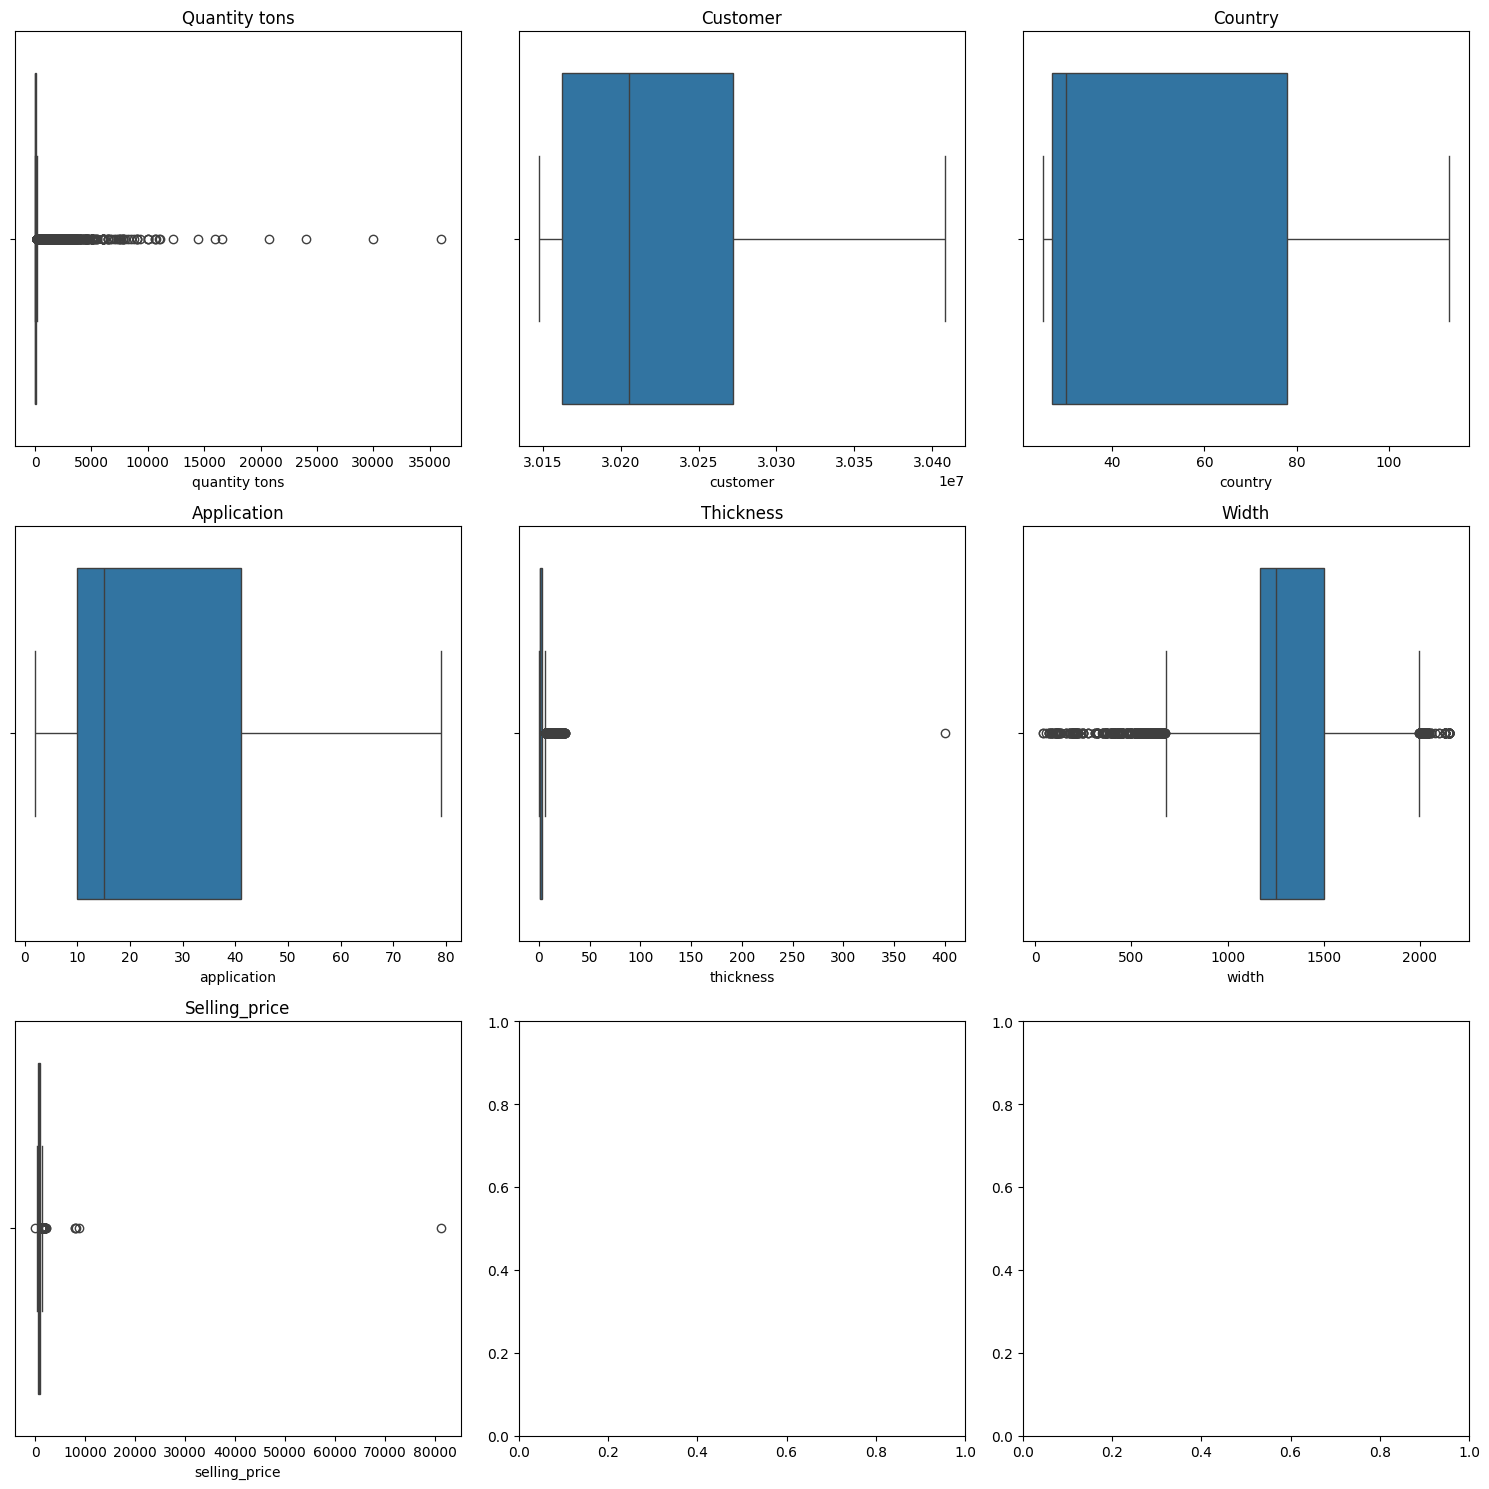

In [44]:
fig, axes = plt.subplots(3,3, figsize=(15,15))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    sns.boxplot(data = df, x = col, ax = axes[i])
    axes[i].set_title(col.capitalize())

plt.tight_layout()
plt.show();

### Removing Outliers

In [45]:
def remove_outliers(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    df_outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    df = df.loc[~df.index.isin(df_outliers.index)]
    
    return df

In [46]:
for col in numeric_cols:
    df = remove_outliers(df, col)

In [47]:
df.shape

(53676, 17)

<Axes: >

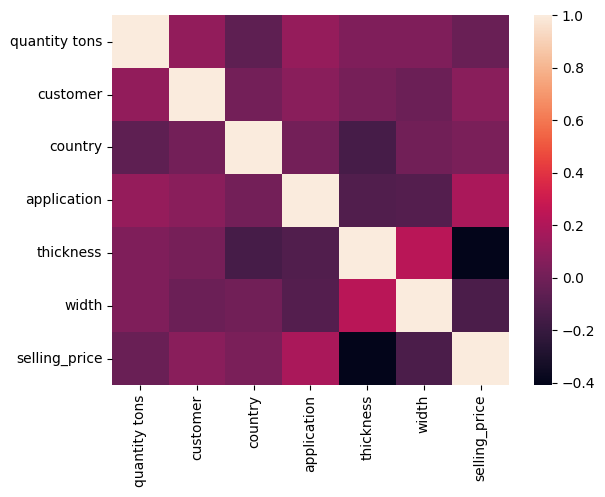

In [48]:
sns.heatmap(df[numeric_cols].corr())

In [49]:
df[numeric_cols].corr()['selling_price'].sort_values(ascending=False)[1:]

application      0.180033
customer         0.080357
country          0.028712
quantity tons   -0.026766
width           -0.128533
thickness       -0.409118
Name: selling_price, dtype: float64

### Transformation of Skewed data

Lambda value for quantity tons: 0.16


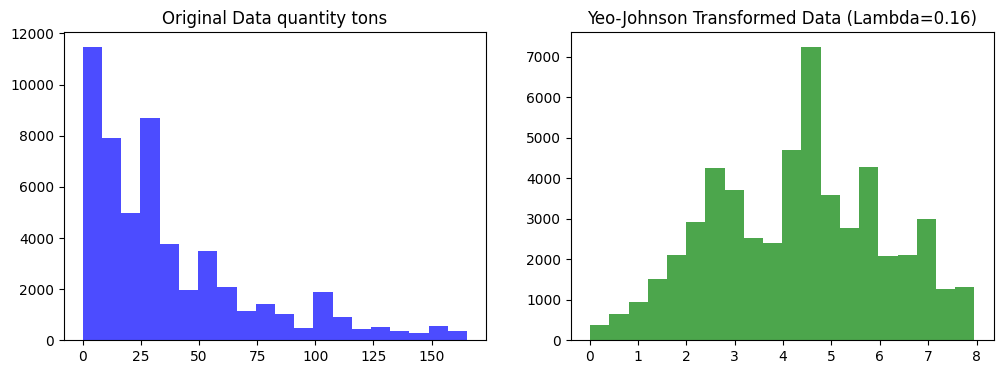

Lambda value for application: -0.30


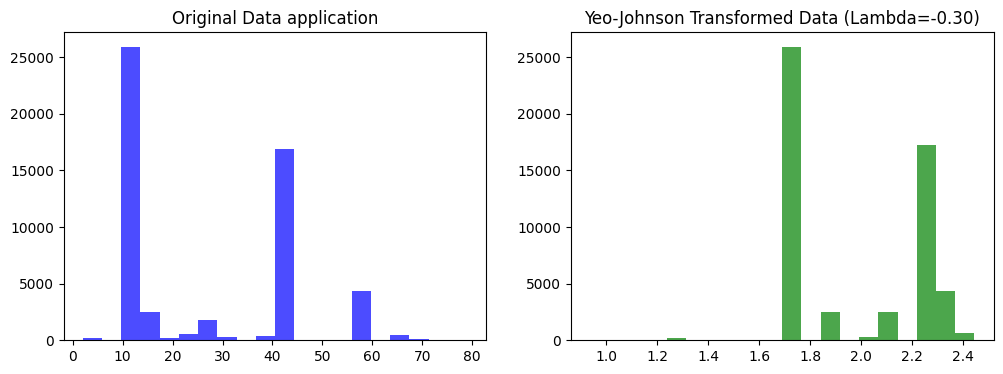

Lambda value for thickness: -0.93


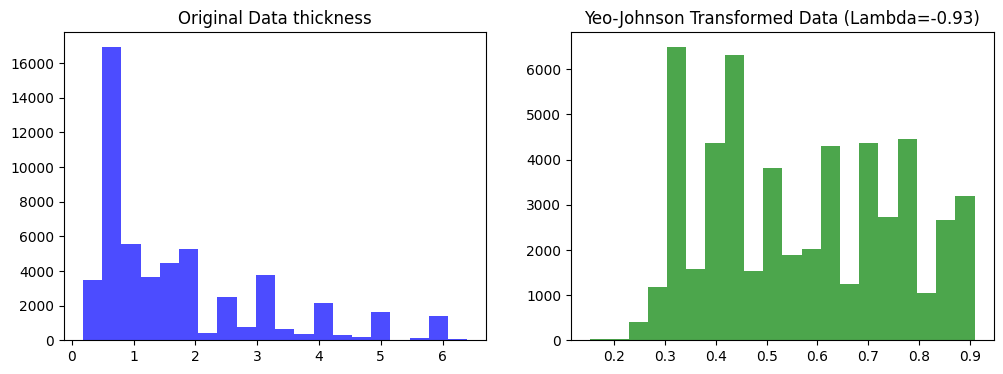

Lambda value for width: 0.93


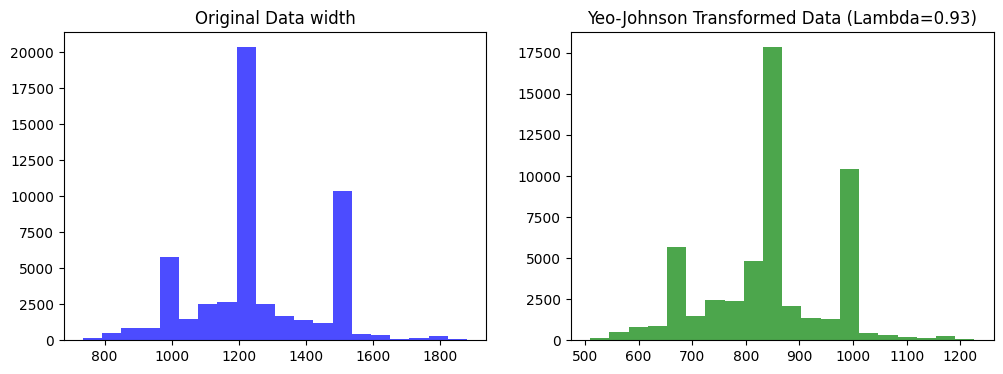

Lambda value for selling_price: 0.22


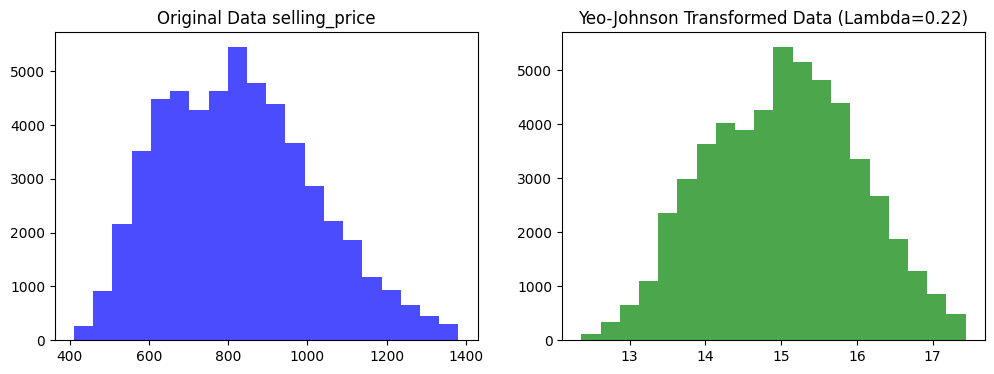

In [50]:
from scipy.stats import yeojohnson

cols_to_check = ['quantity tons', 'application', 'thickness', 'width', 'selling_price']

for col in cols_to_check:
    # Apply Yeo-Johnson transformation
    transformed_data, lambda_value = yeojohnson(df[col])

    # Print or log the lambda value
    print(f'Lambda value for {col}: {lambda_value:.2f}')

    # Plot the original and transformed data
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.hist(df[col], bins=20, color='blue', alpha=0.7)
    plt.title('Original Data ' + str(col))

    plt.subplot(1, 2, 2)
    plt.hist(transformed_data, bins=20, color='green', alpha=0.7)
    plt.title(f'Yeo-Johnson Transformed Data (Lambda={lambda_value:.2f})')

    plt.show()
    df[col] = transformed_data


In [51]:
df.head()

,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,selling_price,purchased_day,purchased_month,purchased_year,delivered_day,delivered_month,delivered_year
0,5.643674,30156308,28,Won,W,1.712756,0.688438,992.828761,DEQ1 S460MC,1670798778,15.262231,1.0,4.0,2021.0,1.0,7.0,2021.0
4,4.713841,30202362,27,Won,S,1.712756,0.380812,685.966808,DC04EK,628377,15.829820,1.0,4.0,2021.0,1.0,7.0,2021.0
5,6.276405,30153510,30,Won,W,2.252764,0.378787,846.644764,PEA1265X595SP,611993,16.627841,1.0,4.0,2021.0,1.0,4.0,2021.0
6,3.995951,30211222,30,Won,W,1.712756,0.314206,615.862774,684Z WHITE ETEX B7032,611993,17.203960,1.0,4.0,2021.0,1.0,7.0,2021.0
7,6.175020,30153510,30,Won,W,2.252764,0.378787,846.644764,GRE1265X595SP,611993,16.625670,1.0,4.0,2021.0,1.0,4.0,2021.0


In [52]:
for col in cols_to_check:
    df[col] = np.round(df[col],2)

### Encoding

In [53]:
df['status'] = df['status'].map({'Won' : 1, 'Lost' : 0})

In [54]:
df = pd.get_dummies(df, columns = ['item type'], prefix = ['item_type'])

In [55]:
le = LabelEncoder()
df['material_ref'] = le.fit_transform(df['material_ref'])
df['product_ref'] = le.fit_transform(df['product_ref'])

In [56]:
types_to_convert = df.select_dtypes(['bool']).columns.to_list()

In [57]:
for col in types_to_convert:
    df[col] = df[col].astype(int)

### Feature Selection

In [58]:
price_corr = df.corr()['selling_price'].sort_values(ascending=False)[1:]

In [59]:
price_corr

purchased_year      0.558456
delivered_year      0.496053
application         0.220221
item_type_W         0.123250
customer            0.073240
product_ref         0.050696
country             0.032826
purchased_day       0.027817
item_type_IPL       0.001658
status             -0.003988
item_type_Others   -0.007227
quantity tons      -0.020638
item_type_WI       -0.033273
material_ref       -0.037840
item_type_S        -0.081376
item_type_PL       -0.104696
width              -0.127392
delivered_month    -0.241102
purchased_month    -0.426666
thickness          -0.493905
delivered_day            NaN
Name: selling_price, dtype: float64

In [60]:
status_corr = df.corr()['status'].sort_values(ascending=False)[1:]

In [61]:
status_corr

item_type_W         0.165769
country             0.099880
application         0.093302
item_type_PL        0.069629
purchased_year      0.030280
item_type_Others    0.021937
item_type_WI        0.011821
product_ref         0.007714
item_type_IPL       0.006228
delivered_month     0.003835
selling_price      -0.003988
purchased_month    -0.005374
purchased_day      -0.018493
delivered_year     -0.026913
material_ref       -0.028121
width              -0.032546
thickness          -0.033835
customer           -0.042194
quantity tons      -0.138406
item_type_S        -0.205748
delivered_day            NaN
Name: status, dtype: float64

In [62]:
cols_to_remove = ['customer', 'product_ref', 'purchased_day', 'item_type_IPL',
                  'item_type_Others', 'item_type_WI', 'delivered_day']

In [63]:
df = df.drop(columns = cols_to_remove)

<Axes: >

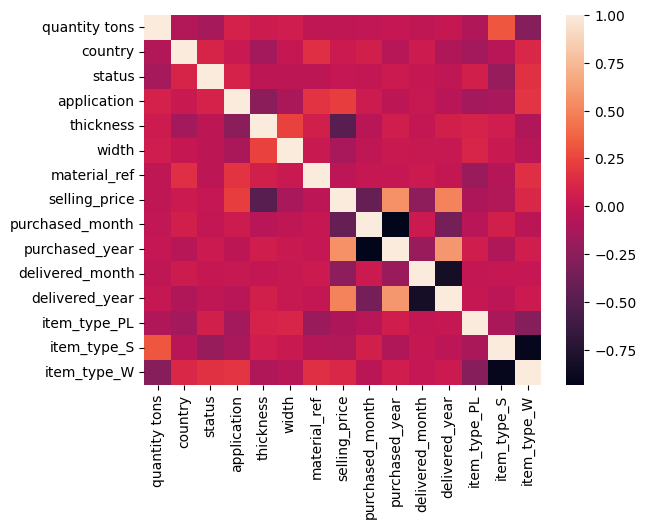

In [64]:
sns.heatmap(df.corr())

In [65]:
df = df.reset_index(drop = True)

In [66]:
df.head()

,quantity tons,country,status,application,thickness,width,material_ref,selling_price,purchased_month,purchased_year,delivered_month,delivered_year,item_type_PL,item_type_S,item_type_W
0,5.64,28,1,1.71,0.69,992.83,4329,15.26,4.0,2021.0,7.0,2021.0,0,0,1
1,4.71,27,1,1.71,0.38,685.97,4243,15.83,4.0,2021.0,7.0,2021.0,0,1,0
2,6.28,30,1,2.25,0.38,846.64,7471,16.63,4.0,2021.0,4.0,2021.0,0,0,1
3,4.00,30,1,1.71,0.31,615.86,2143,17.20,4.0,2021.0,7.0,2021.0,0,0,1
4,6.18,30,1,2.25,0.38,846.64,5577,16.63,4.0,2021.0,4.0,2021.0,0,0,1


### Saving the CSV Files

In [68]:
df.to_csv('Copper_Cleaned.csv', index = False)